# Data Exploration and Analysis




Loading and cleaning data...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Category Analysis:
--------------------------------------------------

Category Distribution:
category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                

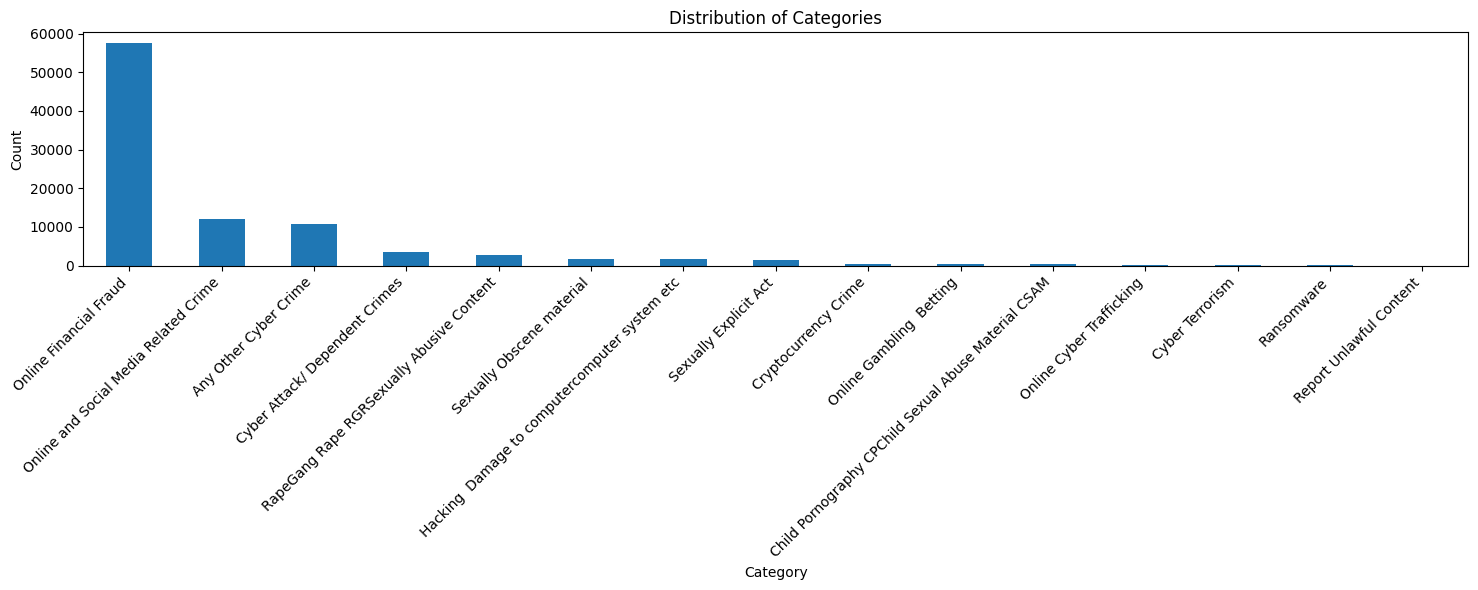


Category Percentages:
category
Online Financial Fraud                                  61.30
Online and Social Media Related Crime                   12.96
Any Other Cyber Crime                                   11.61
Cyber Attack/ Dependent Crimes                           3.85
RapeGang Rape RGRSexually Abusive Content                3.01
Sexually Obscene material                                1.96
Hacking  Damage to computercomputer system etc           1.83
Sexually Explicit Act                                    1.66
Cryptocurrency Crime                                     0.51
Online Gambling  Betting                                 0.47
Child Pornography CPChild Sexual Abuse Material CSAM     0.40
Online Cyber Trafficking                                 0.20
Cyber Terrorism                                          0.17
Ransomware                                               0.06
Report Unlawful Content                                  0.00
Name: count, dtype: float64

Subcatego

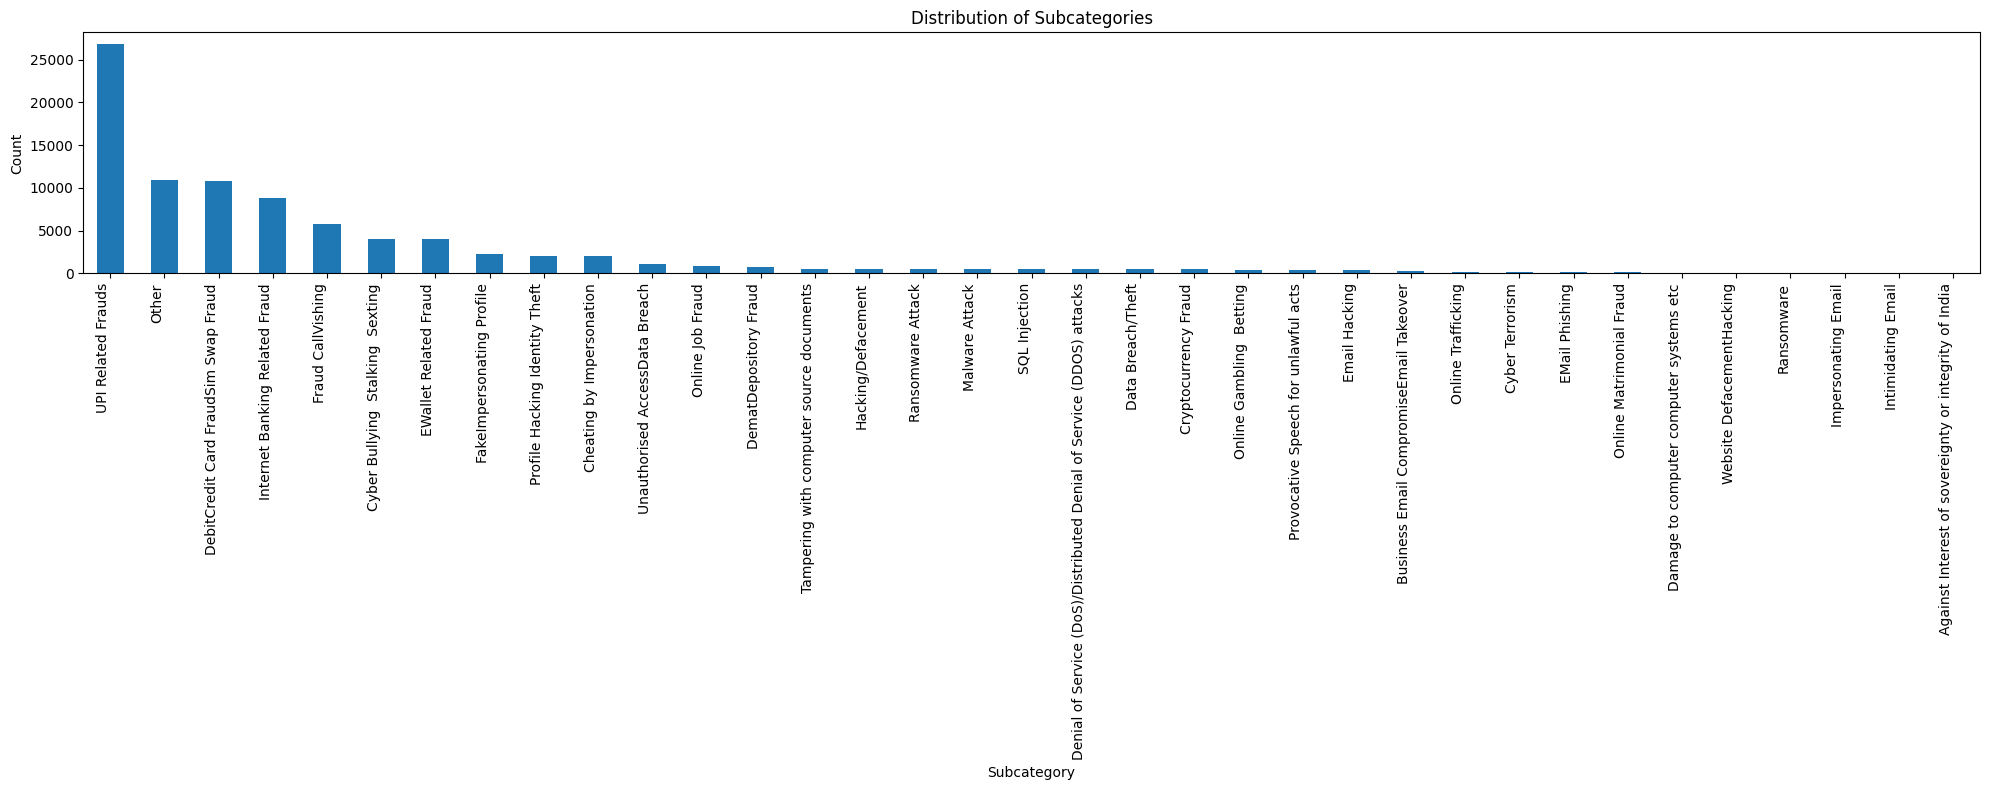


Subcategory Percentages:
sub_category
UPI Related Frauds                                                      28.67
Other                                                                   11.61
DebitCredit Card FraudSim Swap Fraud                                    11.53
Internet Banking Related Fraud                                           9.47
Fraud CallVishing                                                        6.19
Cyber Bullying  Stalking  Sexting                                        4.36
EWallet Related Fraud                                                    4.32
FakeImpersonating Profile                                                2.45
Profile Hacking Identity Theft                                           2.21
Cheating by Impersonation                                                2.12
Unauthorised AccessData Breach                                           1.19
Online Job Fraud                                                         0.97
DematDepository Fraud    

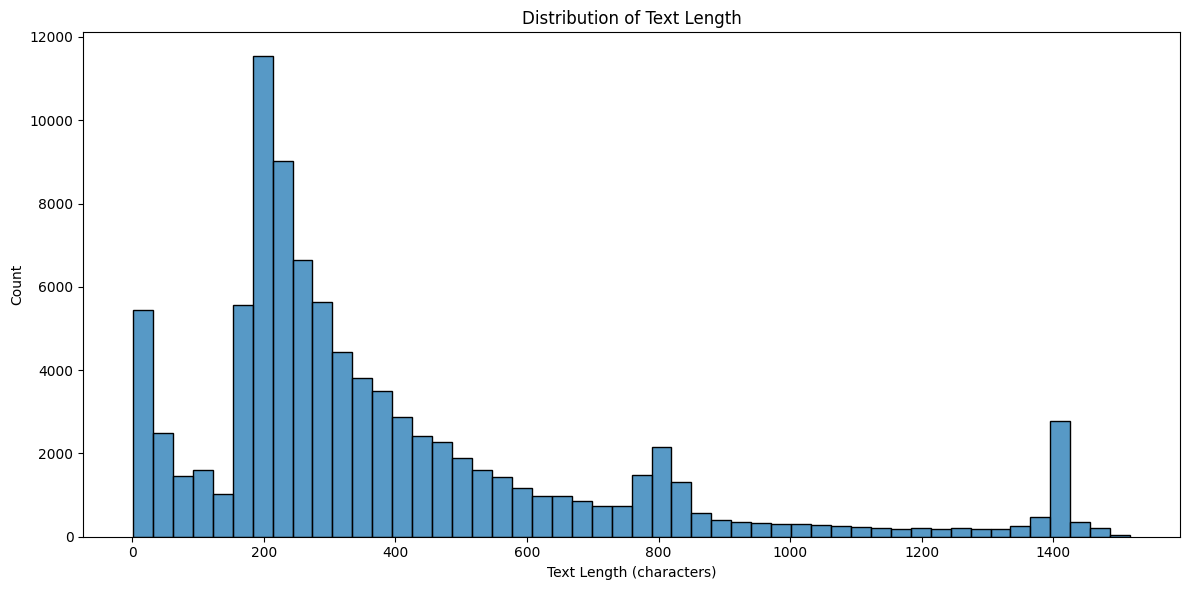


Sample of shortest descriptions:
      crimeaditionalinfo  text_length
3778                              1.0
5490                              1.0
16677                             1.0
66221                             1.0
70784                             1.0

Sample of longest descriptions:
                                      crimeaditionalinfo  text_length
2718   SIR                                           ...       1517.0
34029  Respected sir\r\nYe koi adami hai jo mujhe Pic...       1501.0
80860  froud transaction attached in web so please \r...       1501.0
2760   Hhhdjjjshhhsiiisjjjsoosuuhhskkksghhstyuisghjis...       1499.0
13474  Dear sir\r\n\r\n        Please stop the fraudu...       1499.0

Category-Subcategory Relationship Analysis:
--------------------------------------------------

Category-Subcategory Cross-tabulation:
sub_category                                    Against Interest of sovereignty or integrity of India  \
category                                    

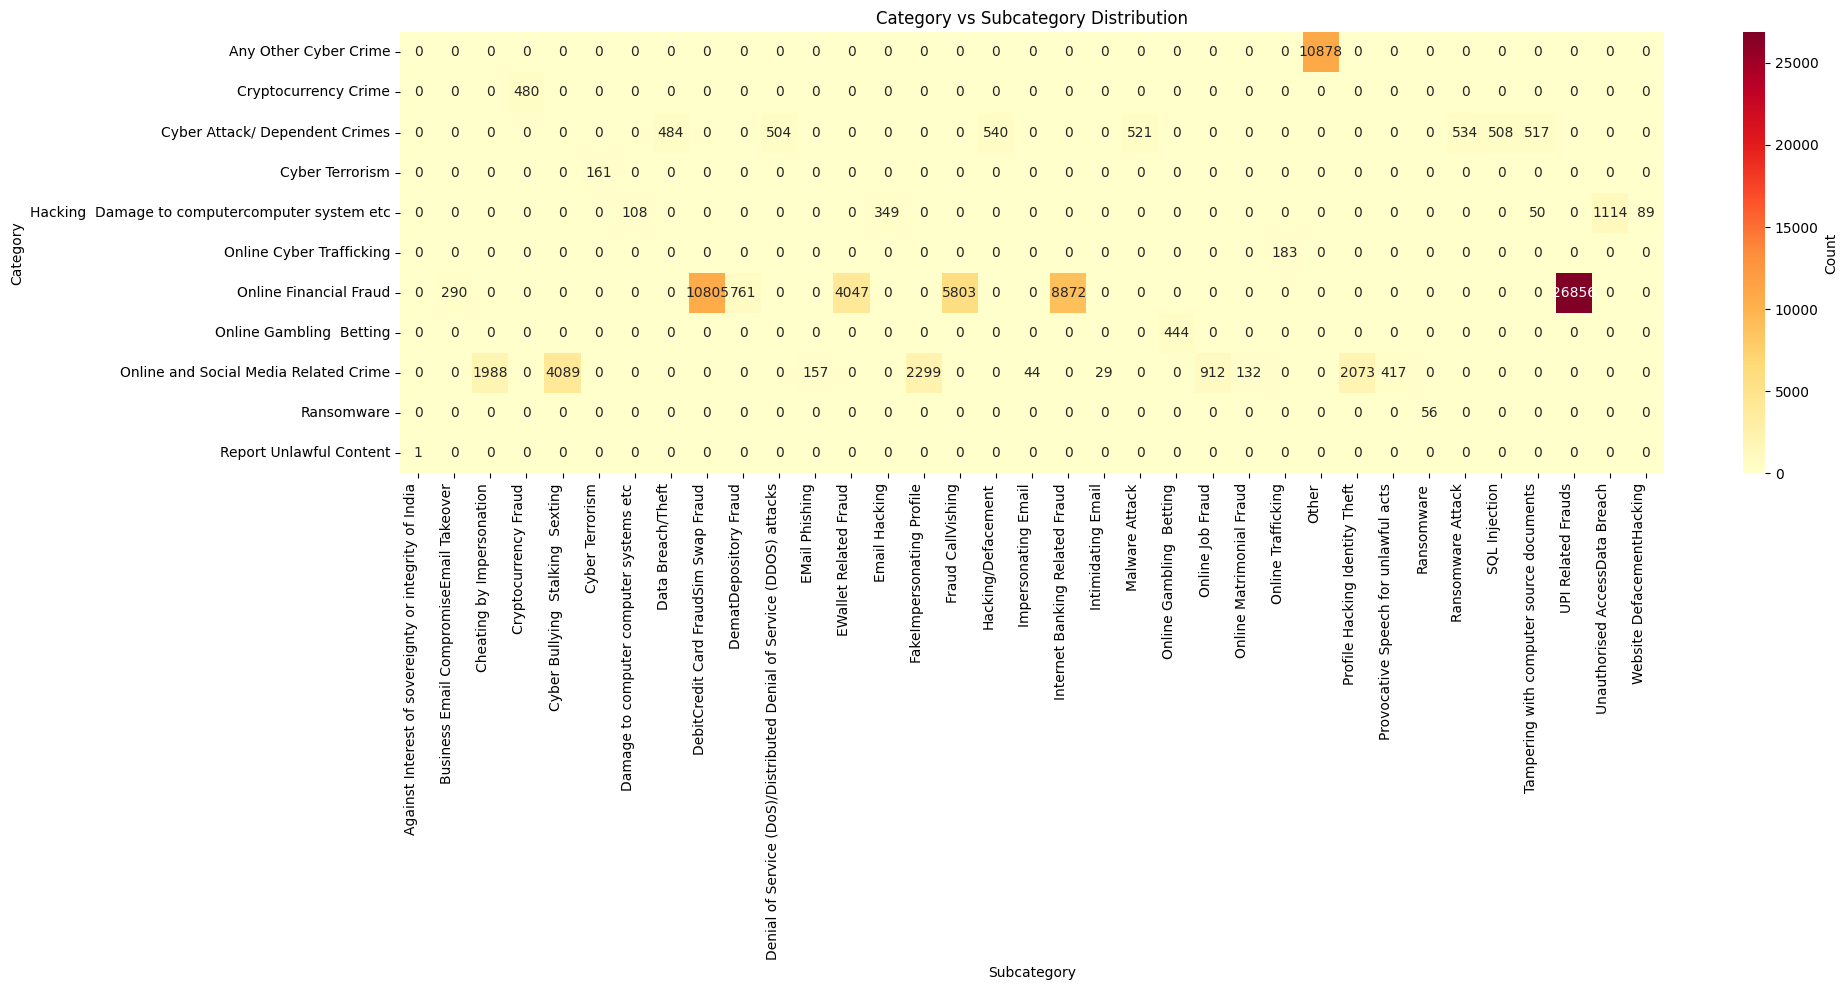


Summary Report:

Total number of records: 93686
Number of unique categories: 15
Number of unique subcategories: 35

Most common category: Online Financial Fraud (57434 entries)
Most common subcategory: UPI Related Frauds (26856 entries)

Average text length: 398.37 characters

Data Quality Metrics:

Data Completeness (%):
category              100.000000
sub_category           92.964797
crimeaditionalinfo     99.977585
text_length            99.977585
dtype: float64

Analysis completed successfully!


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

class CybercrimeDataAnalyzer:
    def __init__(self):
        """Initialize the analyzer"""
        self.category_encoder = LabelEncoder()
        self.subcategory_encoder = LabelEncoder()

    def load_and_clean_data(self, file_path):
        """Load and clean the dataset"""
        # Load data
        df = pd.read_csv(file_path)

        print("\nInitial Data Statistics:")
        print("-" * 50)
        print(f"Total records: {len(df)}")
        print("\nMissing values before cleaning:")
        print(df.isnull().sum())

        # Handle missing values
        df['category'] = df['category'].fillna('Uncategorized')
        df['sub_category'] = df['sub_category'].fillna('Unknown')
        df['crimeaditionalinfo'] = df['crimeaditionalinfo'].fillna('No description provided')

        print("\nMissing values after cleaning:")
        print(df.isnull().sum())

        return df

    def analyze_categories(self, df):
        """Analyze category distributions"""
        print("\nCategory Analysis:")
        print("-" * 50)

        # Category analysis
        category_counts = df['category'].value_counts()
        print("\nCategory Distribution:")
        print(category_counts)

        # Visualize category distribution
        plt.figure(figsize=(15, 6))
        category_counts.plot(kind='bar')
        plt.title('Distribution of Categories')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Category percentages
        category_percentages = (category_counts / len(df) * 100).round(2)
        print("\nCategory Percentages:")
        print(category_percentages)

    def analyze_subcategories(self, df):
        """Analyze subcategory distributions"""
        print("\nSubcategory Analysis:")
        print("-" * 50)

        # Subcategory analysis
        subcategory_counts = df['sub_category'].value_counts()
        print("\nSubcategory Distribution:")
        print(subcategory_counts)

        # Visualize subcategory distribution
        plt.figure(figsize=(20, 8))
        subcategory_counts.plot(kind='bar')
        plt.title('Distribution of Subcategories')
        plt.xlabel('Subcategory')
        plt.ylabel('Count')
        plt.xticks(rotation=90, ha='right')
        plt.tight_layout()
        plt.show()

        # Subcategory percentages
        subcategory_percentages = (subcategory_counts / len(df) * 100).round(2)
        print("\nSubcategory Percentages:")
        print(subcategory_percentages)

    def analyze_text_data(self, df):
        """Analyze text descriptions"""
        print("\nText Data Analysis:")
        print("-" * 50)

        # Text length statistics
        df['text_length'] = df['crimeaditionalinfo'].str.len()

        print("\nText Length Statistics:")
        print(df['text_length'].describe())

        # Visualize text length distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df, x='text_length', bins=50)
        plt.title('Distribution of Text Length')
        plt.xlabel('Text Length (characters)')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

        # Sample of longest and shortest descriptions
        print("\nSample of shortest descriptions:")
        print(df.nsmallest(5, 'text_length')[['crimeaditionalinfo', 'text_length']])

        print("\nSample of longest descriptions:")
        print(df.nlargest(5, 'text_length')[['crimeaditionalinfo', 'text_length']])

    def analyze_category_subcategory_relationship(self, df):
        """Analyze relationship between categories and subcategories"""
        print("\nCategory-Subcategory Relationship Analysis:")
        print("-" * 50)

        # Create cross-tabulation
        cross_tab = pd.crosstab(df['category'], df['sub_category'])
        print("\nCategory-Subcategory Cross-tabulation:")
        print(cross_tab)

        # Visualize relationship
        plt.figure(figsize=(20, 10))
        sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Count'})
        plt.title('Category vs Subcategory Distribution')
        plt.xlabel('Subcategory')
        plt.ylabel('Category')
        plt.xticks(rotation=90, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def generate_summary_report(self, df):
        """Generate a summary report of the dataset"""
        print("\nSummary Report:")
        print("=" * 50)

        # Basic statistics
        print(f"\nTotal number of records: {len(df)}")
        print(f"Number of unique categories: {df['category'].nunique()}")
        print(f"Number of unique subcategories: {df['sub_category'].nunique()}")

        # Category with most entries
        most_common_category = df['category'].mode()[0]
        category_count = df['category'].value_counts().iloc[0]
        print(f"\nMost common category: {most_common_category} ({category_count} entries)")

        # Subcategory with most entries
        most_common_subcategory = df['sub_category'].mode()[0]
        subcategory_count = df['sub_category'].value_counts().iloc[0]
        print(f"Most common subcategory: {most_common_subcategory} ({subcategory_count} entries)")

        # Text statistics
        avg_text_length = df['crimeaditionalinfo'].str.len().mean()
        print(f"\nAverage text length: {avg_text_length:.2f} characters")

        # Data quality metrics
        print("\nData Quality Metrics:")
        completeness = (1 - df.isnull().sum() / len(df)) * 100
        print("\nData Completeness (%):")
        print(completeness)

def main():
    try:
        # Initialize analyzer
        analyzer = CybercrimeDataAnalyzer()

        # Load and clean data
        print("Loading and cleaning data...")
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv('/content/drive/MyDrive/cybercrime_data_train.csv')

        # Perform analyses
        analyzer.analyze_categories(df)
        analyzer.analyze_subcategories(df)
        analyzer.analyze_text_data(df)
        analyzer.analyze_category_subcategory_relationship(df)
        analyzer.generate_summary_report(df)

        print("\nAnalysis completed successfully!")

    except Exception as e:
        print(f"\nAn error occurred: {str(e)}")
        print("Please check your data format and try again.")

if __name__ == "__main__":
    main()

# Model Building

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

from tqdm import tqdm
import pickle

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Load data
from google.colab import drive
drive.mount('/content/drive')
# Ensure you load the data correctly and drop any missing rows in critical columns
df = pd.read_csv('/content/drive/MyDrive/cybercrime_data_train.csv')

print("\n********************\nInitial data: \n********************")
df.info()

df.dropna(subset=['crimeaditionalinfo'], inplace=True)

# Basic Category Alignment
category_mapping = {
    "Financial Fraud Crimes": ["Debit/Credit Card Fraud", "SIM Swap Fraud", "Internet Banking-Related Fraud", "E-Wallet Related Frauds"],
    "Women/Child Related Crime": ["Child Pornography/Child Sexual Abuse Material (CSAM)", "Rape/Gang Rape-Sexually Abusive Content"],
    "Other Cyber Crime": ["Defacement of websites", "Denial of Service (DoS) attacks"],

}
df['category'] = df['category'].map(lambda x: next((k for k, v in category_mapping.items() if x in v), x))
df['sub_category'] = df.apply(lambda row: row['category'] if pd.isnull(row['sub_category']) or row['sub_category'] == "" else row['sub_category'], axis=1)

# Text Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = text.lower()  # Lowercase text
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Remove stopwords and lemmatize
    return text

df['processed_text'] = df['crimeaditionalinfo'].apply(preprocess_text)

print("\n********************\nAfter preprocessing\n********************")
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

********************
Initial data: 
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB

********************
After preprocessing
********************
<class 'pandas.core.frame.DataFrame'>
Index: 93665 entries, 0 to 93685
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93665 non-null  object
 1   sub_category        93665 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
 3   processed_text

In [6]:
# Filter out very rare classes (optional step, consider setting a threshold based on your problem)
rare_classes = df['sub_category'].value_counts()[df['sub_category'].value_counts() < 5].index
df_filtered = df[~df['sub_category'].isin(rare_classes)]

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df_filtered['processed_text'])

# Separate features and target
X = X_tfidf
y = df_filtered['sub_category']

# Use Random Oversampling for rare classes and SMOTE for the rest
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Now apply SMOTE for further balancing
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Display the new distribution of classes
print(pd.Series(y_resampled).value_counts())


sub_category
Cyber Bullying  Stalking  Sexting                                       26843
Tampering with computer source documents                                26843
Hacking/Defacement                                                      26843
Unauthorised AccessData Breach                                          26843
SQL Injection                                                           26843
Provocative Speech for unlawful acts                                    26843
Ransomware Attack                                                       26843
Cyber Terrorism                                                         26843
Child Pornography CPChild Sexual Abuse Material CSAM                    26843
DematDepository Fraud                                                   26843
Fraud CallVishing                                                       26843
Online Trafficking                                                      26843
Online Matrimonial Fraud                           

In [7]:
# Save the TF-IDF vectorizer to your Drive
with open('/content/drive/MyDrive/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [8]:
# Load the saved TF-IDF vectorizer
tfidf_filename = '/content/drive/MyDrive/tfidf_vectorizer.pkl'
loaded_tfidf = pickle.load(open(tfidf_filename, 'rb'))

# Load the test data from Google Drive
df_test = pd.read_csv('/content/drive/MyDrive/cybercrime_data_test.csv')

# Check for non-string values in 'crimeaditionalinfo' and remove them
df_test = df_test[df_test['crimeaditionalinfo'].apply(lambda x: isinstance(x, str))]

# Remove rows with NaN values in 'crimeaditionalinfo'
df_test = df_test.dropna(subset=['crimeaditionalinfo'])

# Remove rows with NaN or empty values in 'sub_category' by assigning the category value
df_test['sub_category'] = df_test.apply(lambda row: row['category'] if pd.isnull(row['sub_category']) or row['sub_category'] == "" else row['sub_category'], axis=1)

# Preprocess the test data
df_test['processed_text'] = df_test['crimeaditionalinfo'].apply(preprocess_text)

# Vectorize the test data using the loaded TF-IDF vectorizer
X_test_tfidf = loaded_tfidf.transform(df_test['processed_text'])

# Separate features and target
X_test = X_test_tfidf
y_test = df_test['sub_category']


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31222 entries, 0 to 31228
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31222 non-null  object
 1   sub_category        31222 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
 3   processed_text      31222 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [10]:
X_test.size

785150

In [11]:
y_test.size

31222

In [12]:
# Model Exploration
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": LinearSVC(class_weight='balanced', max_iter=1000, random_state=42)
}

In [ ]:
# Function to train and evaluate a model with a given dataset and save it
def train_and_evaluate_model(model_name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    print(f"\nTraining Model: {model_name}")
    with tqdm(total=100) as pbar:
        model.fit(X_train, y_train)
        pbar.update(100)

    y_pred_val = model.predict(X_val)
    print(f"\nModel: {model_name}\n*****************************************************")
    print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
    print("Classification Report (Validation):\n", classification_report(y_val, y_pred_val, zero_division=1))

    y_pred_test = model.predict(X_test)
    y_test = y_test.astype(y_train.dtype)
    y_pred_test = y_pred_test.astype(y_train.dtype)
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    # print("Classification Report (Test):\n", classification_report(y_test, y_pred_test, zero_division=1))
    # Get classification report as a dictionary
    report_dict = classification_report(y_test, y_pred_test, output_dict=True, zero_division=1)

    # Create a pandas DataFrame from the report dictionary
    report_df = pd.DataFrame(report_dict).transpose()
    # Add accuracy to the DataFrame
    report_df.loc['accuracy'] = {'precision': accuracy_score(y_test, y_pred_test),
                                'recall': np.nan, 'f1-score': np.nan, 'support': len(y_test)}

    # Convert confusion matrix to DataFrame
    cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'

    # Create an ExcelWriter to save to a single Excel file
    with pd.ExcelWriter(f'/content/drive/MyDrive/model_results_{model_name}.xlsx') as writer:
        report_df.to_excel(writer, sheet_name='Classification Report')
        cm_df.to_excel(writer, sheet_name='Confusion Matrix')

    print(f"Model results for '{model_name}' saved to Google Drive (model_results_{model_name}.xlsx).")
    # Display the formatted DataFrame
    print("\nFormatted Classification Report (Test):\n")
    display(report_df)  # Use display for better formatting in Colab
    report_df.to_csv(f'/content/drive/MyDrive/classification_report_{model_name}.csv', index=True)
    print(f"Classification report for '{model_name}' saved to Google Drive.")
    # print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test))

    # Save the model to Google Drive
    filename = f'/content/drive/MyDrive/cybercrime_model_{model_name}.sav'
    pickle.dump(model, open(filename, 'wb'))
    print(f"Model '{model_name}' saved to Google Drive.")

# Now, instead of the loop for each model, you can call the function for each model
train_and_evaluate_model("Naive Bayes", models["Naive Bayes"], X_train, y_train, X_val, y_val, X_test, y_test)
train_and_evaluate_model("Logistic Regression", models["Logistic Regression"], X_train, y_train, X_val, y_val, X_test, y_test)
train_and_evaluate_model("Random Forest", models["Random Forest"], X_train, y_train, X_val, y_val, X_test, y_test)
train_and_evaluate_model("SVM", models["SVM"], X_train, y_train, X_val, y_val, X_test, y_test)




Training Model: Naive Bayes


100%|██████████| 100/100 [00:09<00:00, 10.23it/s]



Model: Naive Bayes
*****************************************************
Validation Accuracy: 0.4276029744077409
Classification Report (Validation):
                                                                       precision    recall  f1-score   support

                             Business Email CompromiseEmail Takeover       0.44      0.57      0.50      5467
                                           Cheating by Impersonation       0.27      0.15      0.19      5389
                Child Pornography CPChild Sexual Abuse Material CSAM       0.71      0.48      0.58      5370
                                                Cryptocurrency Fraud       0.55      0.78      0.64      5410
                                   Cyber Bullying  Stalking  Sexting       0.27      0.45      0.34      5341
                                                     Cyber Terrorism       0.55      0.45      0.50      5392
                             Damage to computer computer systems etc       0.6

,precision,recall,f1-score,support
Business Email CompromiseEmail Takeover,0.027422,0.333333,0.050676,90.0
Cheating by Impersonation,0.125695,0.157163,0.139679,719.0
Child Pornography CPChild Sexual Abuse Material CSAM,0.264706,0.365854,0.307167,123.0
Computer Generated CSAM/CSEM,1.000000,0.000000,0.000000,2.0
Cryptocurrency Fraud,0.163291,0.777108,0.269874,166.0
Cyber Blackmailing & Threatening,1.000000,0.000000,0.000000,1.0
Cyber Bullying Stalking Sexting,0.480308,0.410688,0.442778,1366.0
Cyber Terrorism,0.006944,0.057692,0.012397,52.0
Damage to computer computer systems etc,0.012605,0.076923,0.021661,39.0
Data Breach/Theft,0.112069,0.076023,0.090592,171.0


Classification report for 'Naive Bayes' saved to Google Drive.
Model 'Naive Bayes' saved to Google Drive.

Training Model: Logistic Regression


100%|██████████| 100/100 [10:41<00:00,  6.42s/it]



Model: Logistic Regression
*****************************************************
Validation Accuracy: 0.5613434833118471
Classification Report (Validation):
                                                                       precision    recall  f1-score   support

                             Business Email CompromiseEmail Takeover       0.63      0.79      0.70      5467
                                           Cheating by Impersonation       0.36      0.21      0.26      5389
                Child Pornography CPChild Sexual Abuse Material CSAM       0.69      0.73      0.71      5370
                                                Cryptocurrency Fraud       0.76      0.84      0.80      5410
                                   Cyber Bullying  Stalking  Sexting       0.48      0.39      0.43      5341
                                                     Cyber Terrorism       0.69      0.90      0.78      5392
                             Damage to computer computer systems etc  

,precision,recall,f1-score,support
Business Email CompromiseEmail Takeover,0.051146,0.322222,0.088280,90.0
Cheating by Impersonation,0.129790,0.146036,0.137435,719.0
Child Pornography CPChild Sexual Abuse Material CSAM,0.136816,0.447154,0.209524,123.0
Computer Generated CSAM/CSEM,1.000000,0.000000,0.000000,2.0
Cryptocurrency Fraud,0.201521,0.638554,0.306358,166.0
Cyber Blackmailing & Threatening,1.000000,0.000000,0.000000,1.0
Cyber Bullying Stalking Sexting,0.470157,0.328697,0.386902,1366.0
Cyber Terrorism,0.005208,0.057692,0.009554,52.0
Damage to computer computer systems etc,0.024823,0.179487,0.043614,39.0
Data Breach/Theft,0.148718,0.169591,0.158470,171.0


Classification report for 'Logistic Regression' saved to Google Drive.
Model 'Logistic Regression' saved to Google Drive.

Training Model: Random Forest


100%|██████████| 100/100 [1:51:16<00:00, 66.76s/it]



Model: Random Forest
*****************************************************
Validation Accuracy: 0.931673913150039
Classification Report (Validation):
                                                                       precision    recall  f1-score   support

                             Business Email CompromiseEmail Takeover       1.00      0.98      0.99      5467
                                           Cheating by Impersonation       0.99      0.95      0.97      5389
                Child Pornography CPChild Sexual Abuse Material CSAM       0.99      0.97      0.98      5370
                                                Cryptocurrency Fraud       0.99      0.99      0.99      5410
                                   Cyber Bullying  Stalking  Sexting       0.94      0.96      0.95      5341
                                                     Cyber Terrorism       1.00      1.00      1.00      5392
                             Damage to computer computer systems etc       1.

,precision,recall,f1-score,support
Business Email CompromiseEmail Takeover,0.086957,0.022222,0.035398,90.0
Cheating by Impersonation,0.256410,0.027816,0.050188,719.0
Child Pornography CPChild Sexual Abuse Material CSAM,0.687500,0.268293,0.385965,123.0
Computer Generated CSAM/CSEM,1.000000,0.000000,0.000000,2.0
Cryptocurrency Fraud,0.417582,0.457831,0.436782,166.0
Cyber Blackmailing & Threatening,1.000000,0.000000,0.000000,1.0
Cyber Bullying Stalking Sexting,0.430769,0.635432,0.513458,1366.0
Cyber Terrorism,0.000000,0.000000,0.000000,52.0
Damage to computer computer systems etc,0.285714,0.051282,0.086957,39.0
Data Breach/Theft,0.180791,0.187135,0.183908,171.0


Classification report for 'Random Forest' saved to Google Drive.


In [ ]:
!pip install transformers
!pip install sentencepiece
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import AdamW
import torch

In [17]:

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df_filtered['sub_category'].unique()))

# Tokenize the text data
def tokenize_function(example):
    return tokenizer(example['processed_text'], padding='max_length', truncation=True, max_length=128)

tokenized_datasets = df_filtered.apply(lambda row: tokenize_function(row), axis=1) # Apply function row-wise
tokenized_test_dataset = df_test.apply(lambda row: tokenize_function(row), axis=1) # Apply function row-wise




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: Series.map() got an unexpected keyword argument 'batched'

In [ ]:
label_mapping = {label: i for i, label in enumerate(df_filtered['sub_category'].unique())}

# Create a separate Series with the labels
labels = df_filtered['sub_category'].map(label_mapping)
test_labels = df_test['sub_category'].map(label_mapping).fillna(-1).astype(int)  # Handle unseen labels in test set

# Add the 'labels' to your tokenized datasets
tokenized_datasets = tokenized_datasets.copy()  # Avoid potential issues by creating a copy
for i in range(len(tokenized_datasets)):
    tokenized_datasets.iloc[i]['labels'] = labels.iloc[i]

# Similarly for the test dataset
tokenized_test_dataset = tokenized_test_dataset.copy()
for i in range(len(tokenized_test_dataset)):
    tokenized_test_dataset.iloc[i]['labels'] = test_labels.iloc[i]


# Split data into training and validation sets
train_dataset, val_dataset = train_test_split(tokenized_datasets, test_size=0.2, random_state=42)

train_dataset_list = [{k: v for k, v in d.items()} for d in train_dataset]
val_dataset_list = [{k: v for k, v in d.items()} for d in val_dataset]
tokenized_test_dataset_list = [{k: v for k, v in d.items()} for d in tokenized_test_dataset]

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # Adjust as needed
    per_device_train_batch_size=16,  # Adjust as needed
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)


# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_list,
    eval_dataset=val_dataset_list,
)

# Fine-tune the model
trainer.train()

# Make predictions on the test set
predictions = trainer.predict(tokenized_test_dataset)

predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = tokenized_test_dataset['labels']

# Evaluate the model
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.439200,1.415440
2,1.336700,1.369662


In [ ]:
print(classification_report(true_labels, predicted_labels))
print(confusion_matrix(true_labels, predicted_labels))

# Save the fine-tuned model
model.save_pretrained("/content/drive/MyDrive/fine_tuned_bert_model")
tokenizer.save_pretrained("/content/drive/MyDrive/fine_tuned_bert_model")